#Customer Behavior Analysis
The task is to analyze the customer purchasing behavior of an online retail company. It involves cleaning the data, creating basic features, and performing some exploratory data analysis to help better understand its customers and their purchasing patterns.

##Dataset
[Online Retail Dataset](https://archive.ics.uci.edu/ml/datasets/online+retail), a transactional dataset from a UK-based online retailer from December 2010 to December 2011.


In [1]:
import pandas
import numpy
import matplotlib.pyplot
import matplotlib.ticker
import io

from google.colab import files

###Data Acquisition

In [11]:
#uploaded = files.upload()
#retails_name = list(uploaded.keys())[0]
#reatail = pandas.read_excel(io.BytesIO(uploaded[retails_name]))
retail = pandas.read_excel("Online Retail.xlsx")

retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


###Data Exploration

In [12]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
retail.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


To handle unknown Customers, I named them as "Guest".

Also instead of null values it is better to have a text as the description.

In [14]:
retail["CustomerID"].fillna("Guest", inplace = True)
retail["Description"].fillna("No description", inplace = True)
retail.head()

<ipython-input-14-e6d04c0799c7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  retail["CustomerID"].fillna("Guest", inplace = True)
<ipython-input-14-e6d04c0799c7>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Guest' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  retail["CustomerID"].fillna("Guest", inplace = True)
<ipython-input-14-e6d04c0799c7>:2: FutureWarning: A value is trying to be set on a 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


To handle duplicates the focus should be on th enumber of the invoices together with the stock number which explains the product in the invoice.

In [15]:
retail.drop_duplicates(subset = ["InvoiceNo", "StockCode"], keep = "first", inplace = True)
retail.shape

(531225, 8)

No negative or zero price is acceptable.

In [16]:
retail = retail[(retail["Quantity"] > 0) & (retail["UnitPrice"] > 0)]
retail.shape

(519582, 8)

###Cleaned Dataset

In [19]:
retail.to_csv("cleaned_online_retail.csv")

In [20]:
cleaned_reatials = pandas.read_csv("cleaned_online_retail.csv")

<ipython-input-20-388bcafe3fc5>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_reatials = pandas.read_csv("cleaned_online_retail.csv")


In [21]:
cleaned_reatials.drop("Unnamed: 0", axis = 1, inplace = True)
cleaned_reatials.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


The price for products is a simple calculation saved in a new column.

In [22]:
cleaned_reatials["TotalPrice"] = cleaned_reatials["Quantity"] * cleaned_reatials["UnitPrice"]
cleaned_reatials.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


The feature needs to be converted to **Datetime** so I can extract month, days, and so on.

In [23]:
cleaned_reatials['InvoiceDate'] = pandas.to_datetime(cleaned_reatials["InvoiceDate"])
cleaned_reatials["Month"] = cleaned_reatials["InvoiceDate"].dt.month
cleaned_reatials.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [24]:
cleaned_reatials["Day_of_week"] = cleaned_reatials["InvoiceDate"].dt.day_name()
cleaned_reatials.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day_of_week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Wednesday


In [25]:
cleaned_reatials["Hour"] = cleaned_reatials["InvoiceDate"].dt.hour
cleaned_reatials.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day_of_week,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Wednesday,8


Peak hour is defined between 9 am and 6 pm that we want to have a feature for it. **1** is for a sale during peak hour and **0** is for non peak hour sales.

In [20]:
cleaned_reatials["Peack_hour"] = cleaned_reatials["Hour"].apply(lambda x: 1 if x >= 9 and x <= 18 else 0)
cleaned_reatials.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,Day_of_week,Hour,Peack_hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,Wednesday,8,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Wednesday,8,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,Wednesday,8,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Wednesday,8,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,Wednesday,8,0


###Visualizations

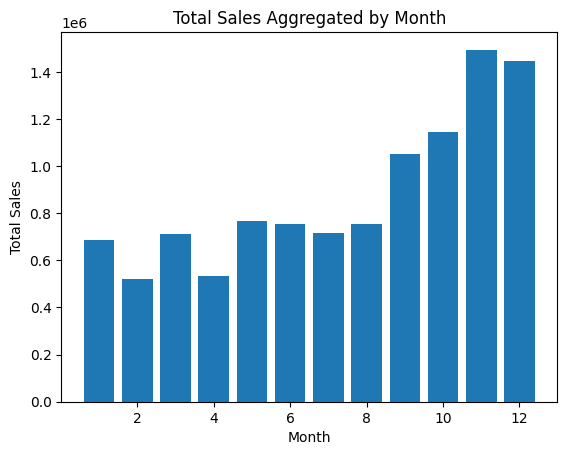

In [21]:
monthly_sales = cleaned_reatials.groupby('Month')['TotalPrice'].sum()


matplotlib.pyplot.bar(monthly_sales.index, monthly_sales.values)
matplotlib.pyplot.xlabel('Month')
matplotlib.pyplot.ylabel('Total Sales')
matplotlib.pyplot.title('Total Sales Aggregated by Month')
matplotlib.pyplot.show()


This bar chart shows that during **November and December** the most sales are happening. The other times of the year is quite linear but by getting close to the end of the year, sales are more.

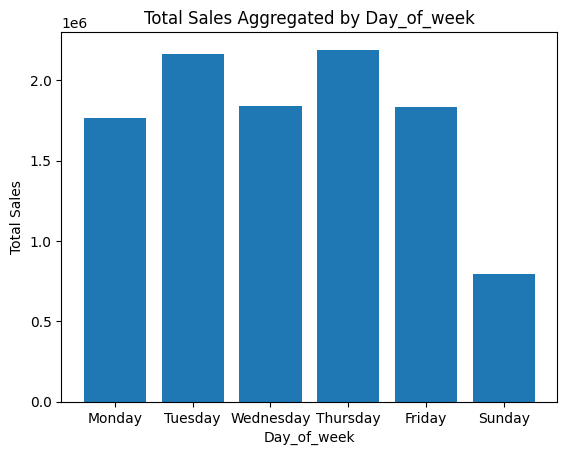

In [22]:
daily_sales = cleaned_reatials.groupby('Day_of_week')['TotalPrice'].sum()
# daily_sales = daily_sales.sort_index()
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',  'Sunday'] # Saturday is not in the list
daily_sales = daily_sales[ordered_days]
matplotlib.pyplot.bar(daily_sales.index, daily_sales.values)
matplotlib.pyplot.xlabel('Day_of_week')
matplotlib.pyplot.ylabel('Total Sales')
matplotlib.pyplot.title('Total Sales Aggregated by Day_of_week')
matplotlib.pyplot.show()

* *Saturday is missing from the days of the week for sales.*

the least sales are made during Sunday and the other days are quite the same.

Here I have calculated sales per customer. and to have a better view, the 10 largest and lowest numbers for sales per customer is calculated. The **Unknown** customers are the top, so during visualizations for analysis it is excluded.


* There are two customers who have the maximum spendings with the IDs 14646 and 18102 with spending over 250,000 British Pounds.

In [27]:
customer_spending = cleaned_reatials.groupby("CustomerID")["TotalPrice"].sum()
customer_spending.nlargest(10)

,TotalPrice
CustomerID,
Guest,1742524.18
14646.0,280206.02
18102.0,259657.30
17450.0,194390.79
16446.0,168472.50
14911.0,143711.17
12415.0,124914.53
14156.0,117193.58
17511.0,91062.38


In [25]:
customer_spending.nsmallest(10)

,TotalPrice
CustomerID,
16738.0,3.75
14792.0,6.20
16454.0,6.90
17956.0,12.75
16878.0,13.30
13307.0,15.00
15823.0,15.00
17763.0,15.00
16093.0,17.00


By setting the limit to the highest number before the *unknown* customers, I excluded them.

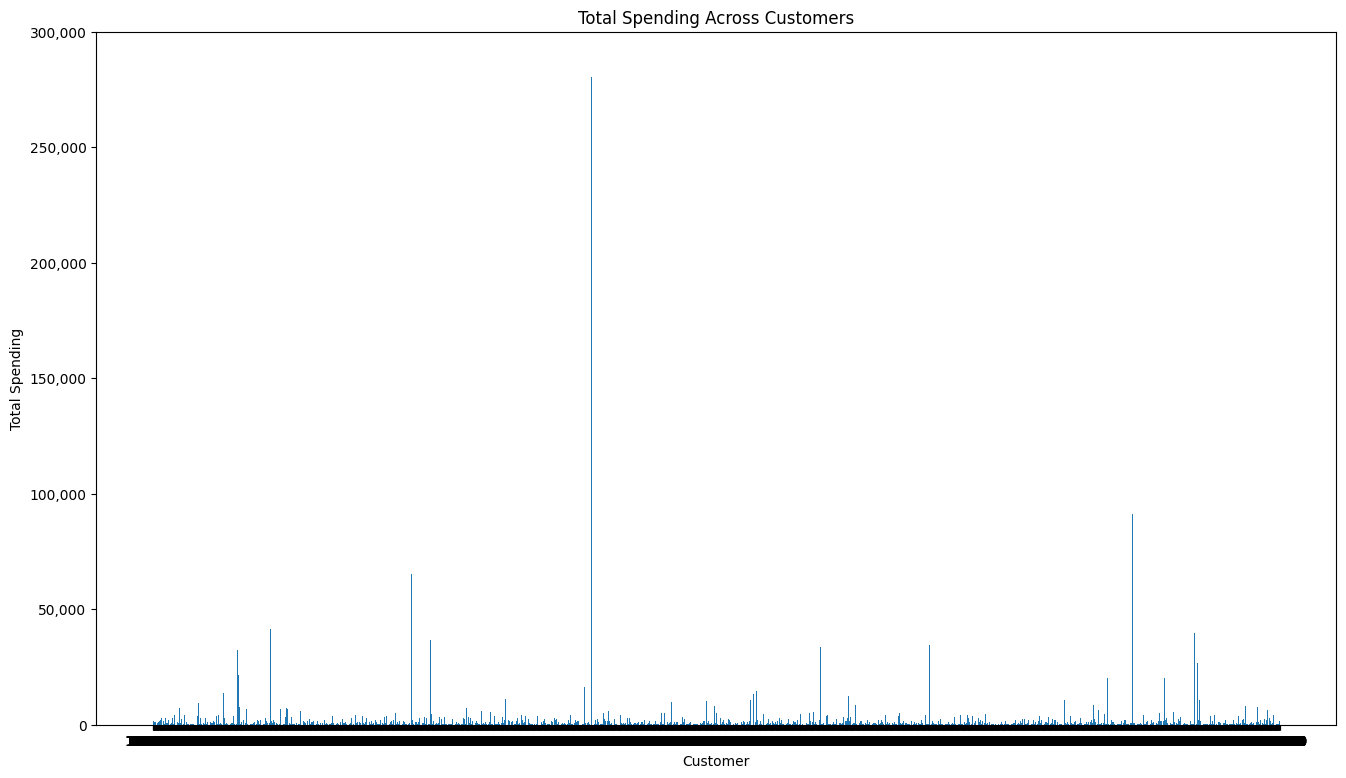

In [28]:
matplotlib.pyplot.figure(figsize=(16, 9))

matplotlib.pyplot.gca().yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

matplotlib.pyplot.bar(customer_spending.index, customer_spending.values)
matplotlib.pyplot.ylim(0, 300000)
matplotlib.pyplot.xlabel("Customer")
matplotlib.pyplot.ylabel("Total Spending")
matplotlib.pyplot.title("Total Spending Across Customers")
matplotlib.pyplot.show()

This Histogram shows that most of the customers spend less than 50,000.

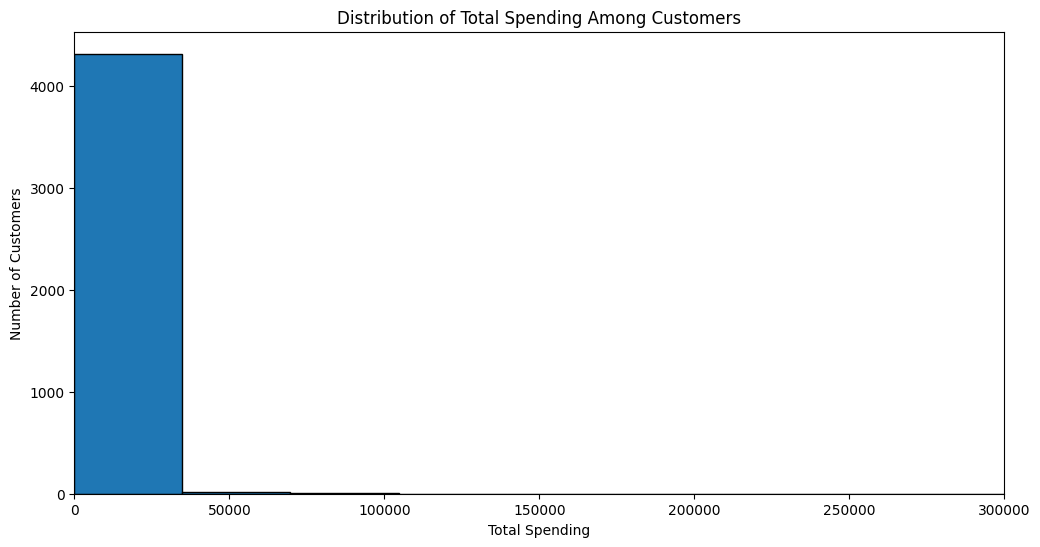

In [29]:
matplotlib.pyplot.figure(figsize=(12, 6))
matplotlib.pyplot.hist(customer_spending, bins=50, edgecolor="black")
matplotlib.pyplot.xlim(0, 300000)
matplotlib.pyplot.xlabel("Total Spending")
matplotlib.pyplot.ylabel("Number of Customers")
matplotlib.pyplot.title("Distribution of Total Spending Among Customers")
matplotlib.pyplot.show()

To find the average spending money for each customer, I grouped them and to have a better insight, the 10 top spending and low spending customers are also listed.

In [31]:
average_transactions = cleaned_reatials.groupby("CustomerID")["TotalPrice"].mean().astype(int)
average_transactions.head()

,TotalPrice
CustomerID,
12346.0,77183
12347.0,23
12348.0,59
12349.0,24
12350.0,19


In [32]:
average_transactions.nlargest(10)

,TotalPrice
CustomerID,
12346.0,77183
16446.0,56157
15098.0,13305
15749.0,4453
15195.0,3861
13135.0,3096
17846.0,2033
18087.0,2027
16532.0,1687


In [33]:
average_transactions.nsmallest(10)

,TotalPrice
CustomerID,
12851.0,2
13271.0,2
13428.0,2
13521.0,2
13684.0,2
14076.0,2
14087.0,2
14529.0,2
14552.0,2


Excluding the **top three spending customers (with amounts of 77183, 56157, and 13305)**, the distributino of the other spending per customers is shown in this histogram.

* Lowest spneding amount is 2.

It shows that still a large number of the customers are spending very small amounts compared to the top ones.

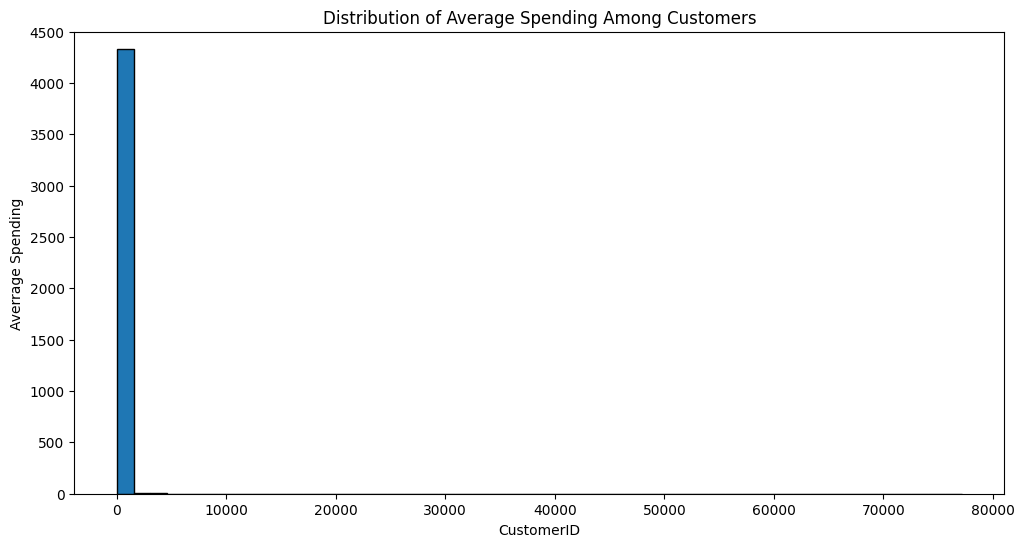

In [34]:
matplotlib.pyplot.figure(figsize=(12, 6))
matplotlib.pyplot.hist(average_transactions, bins = 50, edgecolor = "black")
matplotlib.pyplot.ylim(0, 4500)
matplotlib.pyplot.xlabel("CustomerID")
matplotlib.pyplot.ylabel("Averrage Spending")
matplotlib.pyplot.title("Distribution of Average Spending Among Customers")
matplotlib.pyplot.show()

In [40]:
customer_spending.mode()

,TotalPrice
0,76.32


Finding the most repeated spending amount helps us realize the budget most of the customers spend on the products.

But the average spending amount in total is almost 2440.

In [41]:
customer_spending.mean()

2439.966751094722

##Conclusion

The best time with the most sales is before the end of the year in Fall.

A few loayal customers have the ability to purchase with an amount of higher than 10,000. But the major sales are less than 100.

It is recommended to have seasonal special sales to attract more customers.

Also introducing new products during the high season helps to have more sales.